# K-Means

K-Means adalah Teknik pengelompokan (clustering) berbasis partisi membagi data menjadi K kelompok berdasarkan jarak setiap kelompok direpresentasikan oleh centroid(rata-rata jarak dari titik dalam kluster) atau biasa disebut titik pusat suatu klaster.

Data yang sering kali tidak memiliki label-->Unsupervised learning clustering membantu mengelompokkan data berdasarkan kesamaan karakteristik


## tujuan dan fungsi klustering

### Tujuan dan Fungsi Klaster (Clustering)

**Clustering** adalah salah satu teknik utama dalam **unsupervised learning** yang bertujuan untuk mengelompokkan data berdasarkan kemiripan atau kedekatan karakteristik tanpa menggunakan label atau target output. Klastering sering digunakan dalam data mining, analisis data eksploratif, segmentasi pasar, dan banyak bidang lain.

---

### 🎯 **Tujuan Klastering**

1. **Mengelompokkan Data Serupa**
   Tujuan utama klastering adalah mengelompokkan data ke dalam beberapa **kelompok (klaster)** sedemikian rupa sehingga:

   * Data dalam satu klaster **mirip** satu sama lain (intra-cluster similarity tinggi).
   * Data antar klaster **berbeda jauh** (inter-cluster dissimilarity tinggi).

2. **Reduksi Kompleksitas Data**
   Dengan membagi data ke dalam klaster, kita bisa menyederhanakan analisis data, terutama saat bekerja dengan data besar dan kompleks.

3. **Mengidentifikasi Pola atau Struktur Tersembunyi**
   Klastering dapat membantu mengungkap pola tersembunyi dalam data yang mungkin tidak tampak secara langsung.

4. **Segmentasi**
   Dalam dunia bisnis dan pemasaran, klastering digunakan untuk membagi pelanggan ke dalam segmen berdasarkan perilaku atau atribut tertentu (misalnya: segmentasi pelanggan, segmentasi wilayah, dll).

---

### 🛠️ **Fungsi Klastering dalam Analisis Data**

| Fungsi                           | Penjelasan                                                                                          |
| -------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Eksplorasi Data**              | Klaster membantu memahami struktur data, mendeteksi outlier, dan mengidentifikasi grup penting.     |
| **Pra-pemrosesan**               | Dapat digunakan sebelum algoritma supervised learning untuk menyaring atau mengelompokkan data.     |
| **Rekomendasi Sistem**           | Sistem rekomendasi sering menggunakan klastering untuk menemukan grup pengguna dengan minat serupa. |
| **Pengelompokan Dokumen / Teks** | Untuk mengelompokkan artikel, berita, atau dokumen berdasarkan topik utama.                         |
| **Deteksi Anomali**              | Data yang tidak masuk ke klaster manapun bisa dianggap sebagai anomali atau outlier.                |
| **Biologi / Genetika**           | Untuk mengelompokkan gen, ekspresi gen, atau jenis sel berdasarkan karakteristik biologis.          |





## Instal Library yang dibutuhkan

In [94]:
!pip install pymysql
!pip install psycopg2-binary
!pip install pandas tabulate

## Tampilkan data

In [95]:
import pymysql
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-3efb8003-utspendat.e.aivencloud.com"
DB_PORT = 14793
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_yo9GPrjZtMJ0uKHzkQL"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=DB_HOST,
        port=DB_PORT,
        user=DB_USER,
        password=DB_PASS,
        database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor  # Mengembalikan hasil sebagai dictionary
    )
    cur = conn.cursor()

    # Menjalankan query SQL
    query = "SELECT * FROM irismysql.iris ORDER BY id ASC;"  # Sesuaikan dengan nama tabel
    cur.execute(query)
    rows = cur.fetchall()

    # Jika tabel kosong
    if not rows:
        print("Tabel kosong, tidak ada data untuk ditampilkan.")
    else:
        # Mengubah hasil query menjadi DataFrame pandas
        df = pd.DataFrame(rows)

        # Menampilkan 3 data awal, titik-titik di tengah, dan 3 data akhir
        df_selected = pd.concat([df.head(3), pd.DataFrame([["..."] * len(df.columns)], columns=df.columns), df.tail(3)])

        # Menampilkan tabel dengan format psql
        print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi ke database
    if cur:
        cur.close()
    if conn:
        conn.close()

+------+----------------+----------------+---------------+----------------+---------------+
| id   | Class          | petal length   | petal width   | sepal length   | sepal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 1    | Iris-setosa    | 1.4            | 0.2           | 5.1            | 3.5           |
| 2    | Iris-setosa    | 1.4            | 0.2           | 4.9            | 3.0           |
| 3    | Iris-setosa    | 1.3            | 0.2           | 4.7            | 3.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 148  | Iris-virginica | 5.2            | 2.0           | 6.5            | 3.0           |
| 149  | Iris-virginica | 5.4            | 2.3           | 6.2            | 3.4           |
| 150  | Iris-virginica | 5.1            | 1.8           | 5.9            | 3.0           |
+------+----------------+----------------+---------------+----------------+-----

## Penghapusan kolom class

karena data iris sudah memiliki class atau pengelompokkan kita perlu menghapus kolom clasasnya terlebih dahulu

In [96]:
import pymysql
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-3efb8003-utspendat.e.aivencloud.com"
DB_PORT = 14793
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_yo9GPrjZtMJ0uKHzkQL"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=DB_HOST,
        port=DB_PORT,
        user=DB_USER,
        password=DB_PASS,
        database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    cur = conn.cursor()

    # Menjalankan query SQL
    query = "SELECT * FROM irismysql.iris ORDER BY id ASC;"
    cur.execute(query)
    rows = cur.fetchall()

    if not rows:
        print("Tabel kosong, tidak ada data untuk ditampilkan.")
    else:
        # Mengubah hasil query menjadi DataFrame pandas
        df = pd.DataFrame(rows)

        # Hapus kolom 'Class' jika ada
        if 'Class' in df.columns:
            df = df.drop(columns=['Class'])

        # Standarisasi menggunakan sklearn
        fitur_numerik = ['sepal length', 'sepal width', 'petal length', 'petal width']
        scaler = StandardScaler()
        df_scaled = df.copy()
        df_scaled[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

        # Menampilkan 3 data awal, titik-titik di tengah, dan 3 data akhir
        df_selected = pd.concat([
            df_scaled.head(3),
            pd.DataFrame([["..."] * len(df_scaled.columns)], columns=df_scaled.columns),
            df_scaled.tail(3)
        ])

        # Tampilkan hasil sebagai tabel
        print("\nData setelah standarisasi:")
        print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    if 'cur' in locals():
        cur.close()
    if 'conn' in locals():
        conn.close()



Data setelah standarisasi:
+------+---------------------+---------------------+---------------------+----------------------+
| id   | petal length        | petal width         | sepal length        | sepal width          |
|------+---------------------+---------------------+---------------------+----------------------|
| 1    | -1.3412724047598314 | -1.3129767272601454 | -0.9006811702978088 | 1.0320572244889565   |
| 2    | -1.3412724047598314 | -1.3129767272601454 | -1.1430169111851105 | -0.12495760117130933 |
| 3    | -1.3981381087490836 | -1.3129767272601454 | -1.3853526520724133 | 0.3378483290927974   |
| ...  | ...                 | ...                 | ...                 | ...                  |
| 148  | 0.8196243468317573  | 1.053536733088581   | 0.7956690159133096  | -0.12495760117130933 |
| 149  | 0.9333557548102621  | 1.4479556431467018  | 0.432165404582356   | 0.8006542593569032   |
| 150  | 0.7627586428425047  | 0.7905907930498337  | 0.06866179325140237 | -0.124957601171

## Langkah Langkah Algoritma K-Means

1. Tentukan jumlah cluster
Disini saya akan mencoba dengan data yang ditampilkan membaginya dengan 2,3,4 klaster
2. Pilih K centroid awal secara acak setiap klaster memiliki 1 centroid
3. Hitung jarak setiap data ke tiap centroid
gunakan rumus Encludian Distance
$$
d(\mathbf{x}, \mathbf{c}) = \sqrt{ \sum_{i=1}^{n} (x_i - c_i)^2 }
$$


### Penjelasan:

* $\mathbf{x} = (x_1, x_2, \ldots, x_n)$: vektor data.
* $\mathbf{c} = (c_1, c_2, \ldots, c_n)$: vektor centroid.
* $n$: jumlah dimensi atau fitur.
* $d(\mathbf{x}, \mathbf{c})$: jarak Euclidean antara data dan centroid.

4. Kelompokan data dengan centroid terdekat
5. Hitung ulang centroid dari rata rata anggota kluster
$$
\mu_k = \frac{1}{N_k} \sum_{x_i \in C_k} x_i
$$
### ✅ Penjelasan:

* **\$\mu\_k\$**
  Menyatakan **centroid (titik pusat)** dari klaster ke-**\$k\$**.

* **\$N\_k\$**
  Jumlah **data (anggota)** yang terdapat dalam klaster ke-**\$k\$**.

* **\$x\_i \in C\_k\$**
  Menyatakan bahwa **\$x\_i\$** adalah titik data yang termasuk ke dalam klaster **\$C\_k\$**.

* **\$\sum\_{x\_i \in C\_k} x\_i\$**
  Menyatakan jumlah (penjumlahan vektor) dari seluruh titik data yang berada di dalam klaster **\$C\_k\$**.

* **\$\frac{1}{N\_k}\$**
  Digunakan untuk menghitung rata-rata dari semua anggota dalam klaster tersebut.

6. Ulangi langkah 3-5 hingga konvergen(tidak ada perubahan signifikan)





## Visualisasi K-means data dengan 2 klaster

karena pada data iris mempunyai 4 fitur yang akan dihitung jaraknya nantinya dan kita akan mevisualiasasikan dalam 2 dimensi maka kita menggunakan PCA.

### 📘 Apa itu PCA (Principal Component Analysis)?

**PCA** atau *Principal Component Analysis* adalah **metode reduksi dimensi** yang digunakan dalam *machine learning* dan *data analysis* untuk menyederhanakan data berdimensi tinggi tanpa kehilangan informasi penting secara signifikan.

---

### 🎯 Tujuan PCA:

* **Mengurangi dimensi data** (fitur) menjadi lebih sedikit agar:

  * Analisis menjadi lebih mudah dan cepat.
  * Visualisasi data (misalnya ke 2D atau 3D) menjadi mungkin.
* **Menghilangkan redundansi** (fitur yang saling berkorelasi).
* **Menangkap variansi terbesar** dalam data dengan jumlah komponen yang lebih sedikit.

---

### 🛠️ Cara Kerja PCA (Secara Ringkas):

Berikut adalah rumus utama dalam **Principal Component Analysis (PCA)**

---

### 1. **Standarisasi Data**

Setiap fitur $x_j$ dari data distandarisasi:

$$
z_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}
$$

* $x_{ij}$: nilai fitur ke-$j$ dari data ke-$i$
* $\mu_j$: rata-rata fitur ke-$j$
* $\sigma_j$: standar deviasi fitur ke-$j$

---

### 2. **Kovarian Matriks**

Hitung matriks kovarian $\mathbf{C}$ dari data yang telah distandarisasi:

$$
\mathbf{C} = \frac{1}{n-1} \mathbf{Z}^\top \mathbf{Z}
$$

* $\mathbf{Z}$: matriks data hasil standarisasi
* $n$: jumlah sampel

---

### 3. **Eigenvalue dan Eigenvector**

Cari **eigenvalue** dan **eigenvector** dari matriks kovarian:

$$
\mathbf{C} \mathbf{v} = \lambda \mathbf{v}
$$

* $\lambda$: eigenvalue (mengukur variansi)
* $\mathbf{v}$: eigenvector (arah komponen utama)

---

### 4. **Proyeksi ke Komponen Utama**

Proyeksikan data ke komponen utama:

$$
\mathbf{Z}_{\text{baru}} = \mathbf{Z} \mathbf{W}
$$

* $\mathbf{W}$: matriks yang terdiri dari $k$ eigenvector utama
* $\mathbf{Z}_{\text{baru}}$: data dalam ruang berdimensi lebih rendah (misalnya 2D)

### 📐 Contoh:

Jika Anda memiliki data dengan 4 fitur seperti:

* Petal length
* Petal width
* Sepal length
* Sepal width

...dengan PCA, Anda bisa mereduksinya ke 2 dimensi (komponen utama) seperti:

* PC1 (principal component 1)
* PC2 (principal component 2)

Lalu Anda bisa mem-**plot** data tersebut secara visual untuk melihat struktur klasternya lebih jelas.

---



 ID  Cluster
  0        1
  1        1
  2        1
  3        1
  4        1
  5        1
  6        1
  7        1
  8        1
  9        1
 10        1
 11        1
 12        1
 13        1
 14        1
 15        1
 16        1
 17        1
 18        1
 19        1
 20        1
 21        1
 22        1
 23        1
 24        1
 25        1
 26        1
 27        1
 28        1
 29        1
 30        1
 31        1
 32        1
 33        1
 34        1
 35        1
 36        1
 37        1
 38        1
 39        1
 40        1
 41        1
 42        1
 43        1
 44        1
 45        1
 46        1
 47        1
 48        1
 49        1
 50        0
 51        0
 52        0
 53        0
 54        0
 55        0
 56        0
 57        1
 58        0
 59        0
 60        0
 61        0
 62        0
 63        0
 64        0
 65        0
 66        0
 67        0
 68        0
 69        0
 70        0
 71        0
 72        0
 73        0
 74        0
 75        0

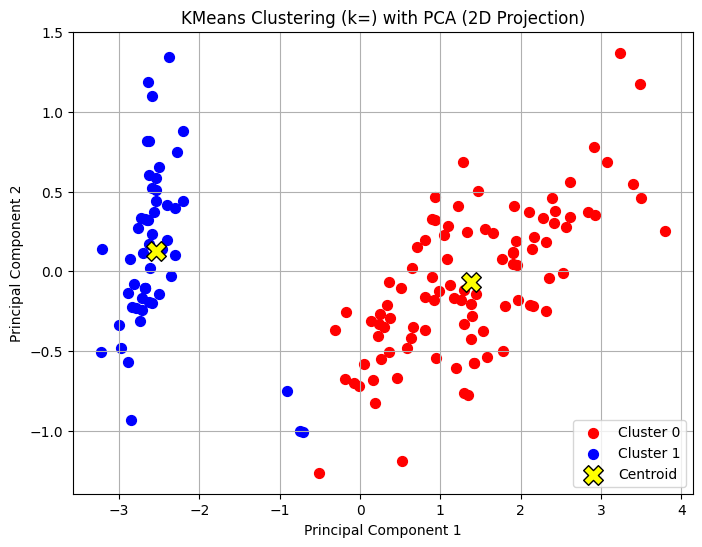

In [97]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ambil fitur numerik
val_X = df[['petal length', 'petal width', 'sepal length', 'sepal width']].values

# KMeans model untuk 2 klaster
k_means_C2 = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=5,
    max_iter=400,
    tol=0.0001,
    random_state=42,
    algorithm='lloyd'
)

# Latih model
k_means_C2.fit(val_X)

# Ambil label dan centroid
labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_

# Tampilkan tabel ID dan klaster
df_clustered = df.copy()
df_clustered['Cluster'] = labelC2
tabel_klaster = df_clustered.reset_index()[['index', 'Cluster']]
tabel_klaster.columns = ['ID', 'Cluster']
print(tabel_klaster.to_string(index=False))

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
val_X_pca = pca.fit_transform(val_X)
centroidsC2_pca = pca.transform(centroidsC2)

# Plot hasil klaster
plt.figure(figsize=(8, 6))
colors = ['red', 'blue',]

for i in range(2):  # Karena k=2
    plt.scatter(
        val_X_pca[labelC2 == i, 0],
        val_X_pca[labelC2 == i, 1],
        s=50,
        c=colors[i],
        label=f'Cluster {i}'
    )

# Plot centroid
plt.scatter(
    centroidsC2_pca[:, 0], centroidsC2_pca[:, 1],
    s=200,
    c='yellow',
    edgecolor='black',
    marker='X',
    label='Centroid'
)

plt.title('KMeans Clustering (k=) with PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## Evaluasi Klastering menggunakan Inersia
Setelah kita melakukan klastering 2 klaster dengan k-means kita bisa melakukan evaluasi hasil klasteringnya dengan Inersia.
### 📘 **Pengertian Inersia dalam K-Means Clustering**

**Inersia** (Inertia) dalam konteks *K-Means Clustering* adalah **ukuran seberapa rapat data dalam setiap klaster terhadap centroid-nya masing-masing**.

Secara lebih formal:

> Inersia adalah **jumlah kuadrat jarak** dari setiap titik data ke **centroid** (titik pusat) klaster tempat data tersebut tergabung.

---

### 🔍 Fungsi Inersia:

* Menilai **kualitas klastering**: semakin kecil nilai inersia, semakin rapat data dalam klaster (semakin baik).
* Digunakan untuk menentukan jumlah klaster optimal menggunakan **metode Elbow**: titik di mana penurunan inersia mulai melambat secara signifikan adalah jumlah klaster terbaik.

---

### 💡 Contoh:

Jika kamu mengelompokkan bunga iris berdasarkan ukuran kelopak dan sepalnya, maka inersia menunjukkan **seberapa dekat** ukuran masing-masing bunga terhadap pusat dari kelompok (klaster) tempat dia masuk.


### 🧮 **Rumus Inertia K-Means (Total Within-Cluster Sum of Squares):**

$$
\text{Inertia} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

---

### 📘 Keterangan:

* $K$: jumlah klaster
* $C_k$: himpunan data dalam klaster ke-$k$
* $x_i$: titik data ke-$i$ dalam klaster $C_k$
* $\mu_k$: centroid (rata-rata) dari klaster $k$
* $\|x_i - \mu_k\|^2$: kuadrat jarak Euclidean antara $x_i$ dan centroid-nya




In [98]:
from sklearn.cluster import KMeans
import numpy as np


# Latih model
k_means_C2.fit(val_X)

# Ambil label, centroid, dan inertia
labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
InertiaC2 = k_means_C2.inertia_

print(f"Inertia terbaik (2 klaster): {InertiaC2:.6f}")

Inertia terbaik (2 klaster): 152.368706


## Evaluasi klastering menggunakan silhouette

Selain menggunakan inersia kita juga bisa menggunakan silhouette untuk evaluasi 2 klaster dari K-means yang ditentukan sebelumnya

### 📘 **Pengertian Silhouette Score**

**Silhouette Score** adalah metrik evaluasi untuk menilai **kualitas klastering**. Metrik ini mengukur **seberapa mirip** suatu data dengan klasternya sendiri dibandingkan dengan klaster lain.

Nilai Silhouette berada dalam rentang:

* **+1**: Titik sangat cocok dengan klasternya.
* **0**: Titik berada di batas antara dua klaster.
* **−1**: Titik kemungkinan salah klaster.

---

### 🔍 **Tujuan Silhouette Score**:

* Menilai apakah pemisahan antar klaster sudah baik.
* Digunakan untuk memilih jumlah klaster optimal.

---

### 🧮 **Rumus dalam LaTeX**:

Jika:

* $a(i)$: Rata-rata jarak antara titik $i$ dan semua titik lain dalam **klaster yang sama**.
* $b(i)$: Rata-rata jarak antara titik $i$ dan semua titik dalam **klaster terdekat yang berbeda**.

Maka:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

---

### 📊 **Interpretasi**:

* $s(i) \approx 1$: Titik berada di dalam klaster yang tepat.
* $s(i) \approx 0$: Titik berada di batas antar klaster.
* $s(i) < 0$: Titik lebih dekat ke klaster lain daripada klasternya sendiri → kemungkinan salah klaster.

---

Jika ingin menghitung **rata-rata Silhouette Score** untuk seluruh data:

$$
\text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

Dengan $n$ adalah jumlah total data.


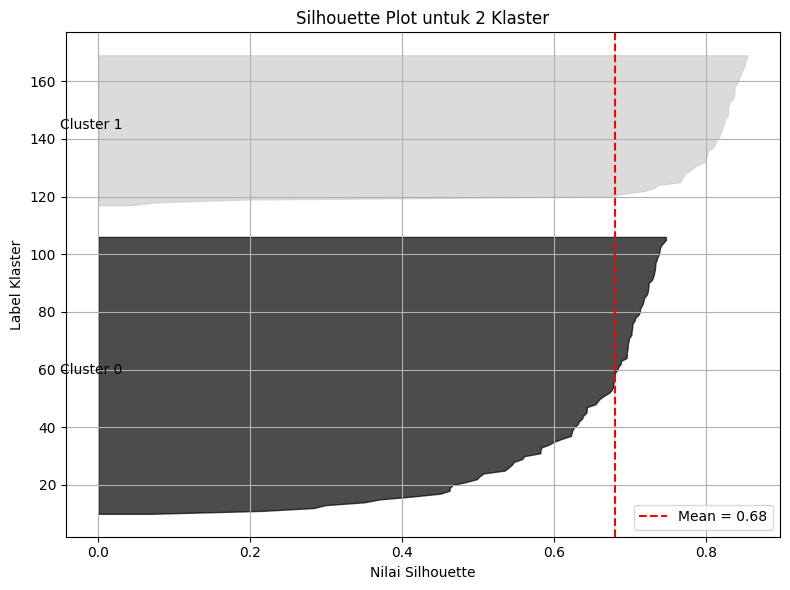

Silhouette Score (2 klaster): 0.680814


In [99]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Hitung nilai silhouette score global dan per sampel
silhouetteC2 = silhouette_score(val_X, labelC2)
sample_silhouette_values = silhouette_samples(val_X, labelC2)

# Plot silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
n_clusters = 2
colors = cm.nipy_spectral(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    # Ambil dan urutkan nilai silhouette untuk klaster ke-i
    ith_cluster_silhouette_values = sample_silhouette_values[labelC2 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = colors[i]
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10  # spasi antar klaster

# Garis rata-rata silhouette
plt.axvline(x=silhouetteC2, color="red", linestyle="--", label=f"Mean = {silhouetteC2:.2f}")

# Label dan tampilan
plt.title("Silhouette Plot untuk 2 Klaster")
plt.xlabel("Nilai Silhouette")
plt.ylabel("Label Klaster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cetak nilai silhouette score
print(f"Silhouette Score (2 klaster): {silhouetteC2:.6f}")


## Visualisasi K-Means dengan 3 klaster

 ID  Cluster
  0        1
  1        1
  2        1
  3        1
  4        1
  5        1
  6        1
  7        1
  8        1
  9        1
 10        1
 11        1
 12        1
 13        1
 14        1
 15        1
 16        1
 17        1
 18        1
 19        1
 20        1
 21        1
 22        1
 23        1
 24        1
 25        1
 26        1
 27        1
 28        1
 29        1
 30        1
 31        1
 32        1
 33        1
 34        1
 35        1
 36        1
 37        1
 38        1
 39        1
 40        1
 41        1
 42        1
 43        1
 44        1
 45        1
 46        1
 47        1
 48        1
 49        1
 50        0
 51        2
 52        0
 53        2
 54        2
 55        2
 56        2
 57        2
 58        2
 59        2
 60        2
 61        2
 62        2
 63        2
 64        2
 65        2
 66        2
 67        2
 68        2
 69        2
 70        2
 71        2
 72        2
 73        2
 74        2
 75        2

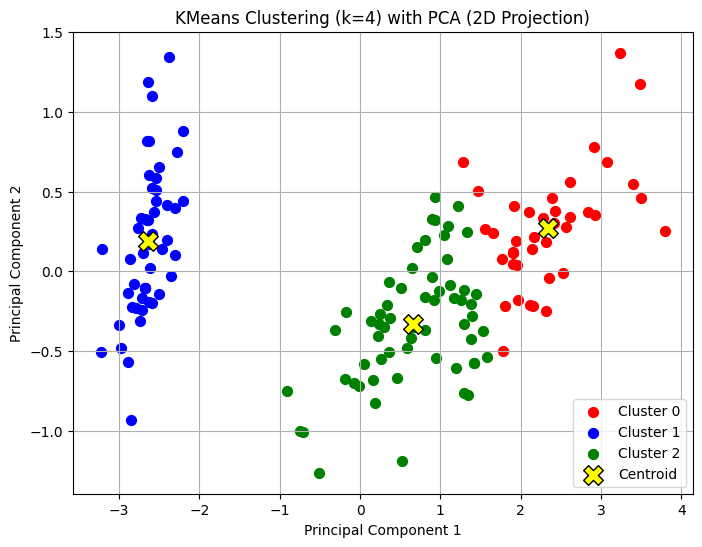

In [100]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ambil fitur numerik
val_X = df[['petal length', 'petal width', 'sepal length', 'sepal width']].values

# KMeans model untuk 3 klaster
k_means_C3 = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=5,
    max_iter=400,
    tol=0.0001,
    random_state=42,
    algorithm='lloyd'
)

# Latih model
k_means_C3.fit(val_X)

# Ambil label dan centroid
labelC3 = k_means_C3.labels_
centroidsC3 = k_means_C3.cluster_centers_

# Tampilkan tabel ID dan klaster
df_clustered = df.copy()
df_clustered['Cluster'] = labelC3
tabel_klaster = df_clustered.reset_index()[['index', 'Cluster']]
tabel_klaster.columns = ['ID', 'Cluster']
print(tabel_klaster.to_string(index=False))

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
val_X_pca = pca.fit_transform(val_X)
centroidsC3_pca = pca.transform(centroidsC3)

# Plot hasil klaster
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for i in range(3):  # Karena k=3
    plt.scatter(
        val_X_pca[labelC3 == i, 0],
        val_X_pca[labelC3 == i, 1],
        s=50,
        c=colors[i],
        label=f'Cluster {i}'
    )

# Plot centroid
plt.scatter(
    centroidsC3_pca[:, 0], centroidsC3_pca[:, 1],
    s=200,
    c='yellow',
    edgecolor='black',
    marker='X',
    label='Centroid'
)

plt.title('KMeans Clustering (k=4) with PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
# Tambahkan kolom target manual berdasarkan rentang ID (asumsi cluster seharusnya berurutan)
df_clustered['Target'] = df_clustered['id'].apply(
    lambda x: 0 if x <51 else (1 if x < 101 else 2)
)

# Fungsi hitung ID yang tidak sesuai (klaster berbeda dari klaster mayoritas pada target)
def hitung_tidak_sesuai(df, target_value):
    subset = df[df['Target'] == target_value]
    cluster_mode = subset['Cluster'].mode()[0]  # klaster mayoritas di rentang ID ini
    mismatch = subset[subset['Cluster'] != cluster_mode]  # data yang klasternya tidak sesuai
    return mismatch

# Hitung yang tidak sesuai per target (3 klaster)
mismatch0 = hitung_tidak_sesuai(df_clustered, 0)
mismatch1 = hitung_tidak_sesuai(df_clustered, 1)
mismatch2 = hitung_tidak_sesuai(df_clustered, 2)

# Gabungkan semua data yang tidak sesuai
total_mismatch = pd.concat([mismatch0, mismatch1, mismatch2])
jumlah_tidak_sesuai = len(total_mismatch)

# Tampilkan hasil dengan ID dikurangi 1
print(f"Jumlah ID yang tidak sesuai dengan klaster mayoritas di rentang ID targetnya: {jumlah_tidak_sesuai}")
print("\nSemua ID yang tidak sesuai:")
print(
    total_mismatch.assign(id=total_mismatch['id'] - 1)[['id','Cluster']].to_string(index=False)
)


Jumlah ID yang tidak sesuai dengan klaster mayoritas di rentang ID targetnya: 17

Semua ID yang tidak sesuai:
 id  Cluster
 50        0
 52        0
 77        0
101        2
106        2
113        2
114        2
119        2
121        2
123        2
126        2
127        2
133        2
138        2
142        2
146        2
149        2


## Evaluasi dengan menggunakan Inersia untuk  3 klaster

In [102]:
from sklearn.cluster import KMeans
import numpy as np


# Latih model
k_means_C3.fit(val_X)

# Ambil label, centroid, dan inertia
labelC3 = k_means_C3.labels_
centroidsC3 = k_means_C3.cluster_centers_
InertiaC3 = k_means_C3.inertia_

print(f"Inertia terbaik (2 klaster): {InertiaC3:.6f}")

Inertia terbaik (2 klaster): 78.945066


## Evaluasi dengan menggunakan silhouette 3 klaster

Silhouette Score (3 klaster): 0.550964


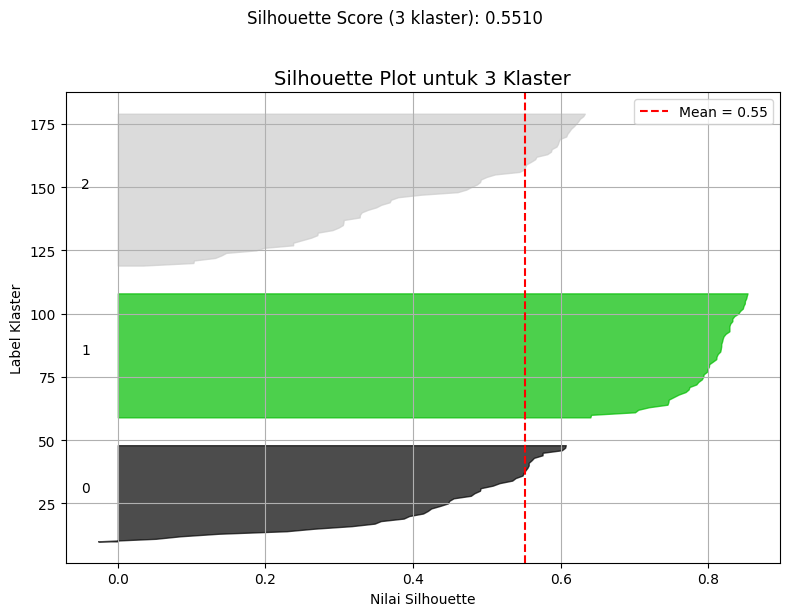

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# KMeans untuk 3 klaster
k_means_C3 = KMeans(n_clusters=3, random_state=42)
labelC3 = k_means_C3.fit_predict(val_X)
silhouetteC3 = silhouette_score(val_X, labelC3)

# Cetak score
print(f"Silhouette Score (3 klaster): {silhouetteC3:.6f}")

# Hitung silhouette per sampel
sample_silhouette_values = silhouette_samples(val_X, labelC3)

# Plot silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
n_clusters = 3
colors = cm.nipy_spectral(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labelC3 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = colors[i]
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Garis rata-rata silhouette
plt.axvline(x=silhouetteC3, color="red", linestyle="--", label=f"Mean = {silhouetteC3:.2f}")

# Tambahkan teks skor di atas plot
plt.title("Silhouette Plot untuk 3 Klaster", fontsize=14)
plt.suptitle(f"Silhouette Score (3 klaster): {silhouetteC3:.4f}", fontsize=12, y=1.02)

plt.xlabel("Nilai Silhouette")
plt.ylabel("Label Klaster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualisasi K-Means dengan 4 klaster


 ID  Cluster
  0        0
  1        0
  2        0
  3        0
  4        0
  5        0
  6        0
  7        0
  8        0
  9        0
 10        0
 11        0
 12        0
 13        0
 14        0
 15        0
 16        0
 17        0
 18        0
 19        0
 20        0
 21        0
 22        0
 23        0
 24        0
 25        0
 26        0
 27        0
 28        0
 29        0
 30        0
 31        0
 32        0
 33        0
 34        0
 35        0
 36        0
 37        0
 38        0
 39        0
 40        0
 41        0
 42        0
 43        0
 44        0
 45        0
 46        0
 47        0
 48        0
 49        0
 50        3
 51        3
 52        3
 53        2
 54        3
 55        2
 56        3
 57        2
 58        3
 59        2
 60        2
 61        2
 62        2
 63        3
 64        2
 65        3
 66        3
 67        2
 68        3
 69        2
 70        3
 71        2
 72        3
 73        3
 74        3
 75        3

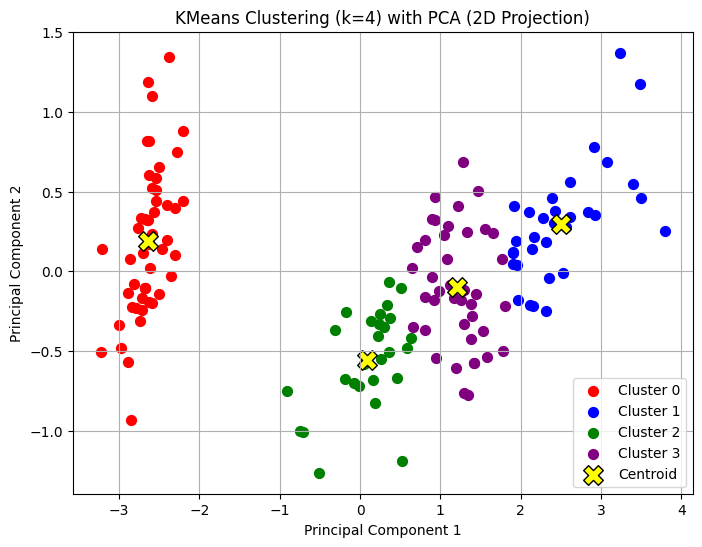

In [104]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ambil fitur numerik
val_X = df[['petal length', 'petal width', 'sepal length', 'sepal width']].values

# KMeans model untuk 4 klaster
k_means_C4 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=5,
    max_iter=400,
    tol=0.0001,
    random_state=42,
    algorithm='lloyd'
)

# Latih model
k_means_C4.fit(val_X)

# Ambil label dan centroid
labelC4 = k_means_C4.labels_
centroidsC4 = k_means_C4.cluster_centers_

# Tampilkan tabel ID dan klaster
df_clustered = df.copy()
df_clustered['Cluster'] = labelC4
tabel_klaster = df_clustered.reset_index()[['index', 'Cluster']]
tabel_klaster.columns = ['ID', 'Cluster']
print(tabel_klaster.to_string(index=False))

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
val_X_pca = pca.fit_transform(val_X)
centroidsC4_pca = pca.transform(centroidsC4)

# Plot hasil klaster
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple']

for i in range(4):  # Karena k=4
    plt.scatter(
        val_X_pca[labelC4 == i, 0],
        val_X_pca[labelC4 == i, 1],
        s=50,
        c=colors[i],
        label=f'Cluster {i}'
    )

# Plot centroid
plt.scatter(
    centroidsC4_pca[:, 0], centroidsC4_pca[:, 1],
    s=200,
    c='yellow',
    edgecolor='black',
    marker='X',
    label='Centroid'
)

plt.title('KMeans Clustering (k=4) with PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## evaluasi K-means menggunakan Inersia dengan 4 klaster

In [105]:
from sklearn.cluster import KMeans
import numpy as np


# Latih model
k_means_C4.fit(val_X)

# Ambil label, centroid, dan inertia
labelC4 = k_means_C4.labels_
centroidsC4 = k_means_C4.cluster_centers_
InertiaC4 = k_means_C4.inertia_

print(f"Inertia terbaik (4 klaster): {InertiaC4:.6f}")


Inertia terbaik (4 klaster): 57.345409


## Evaluasi K-Means dengan menggunakan silhouette

Silhouette Score (4 klaster): 0.497412


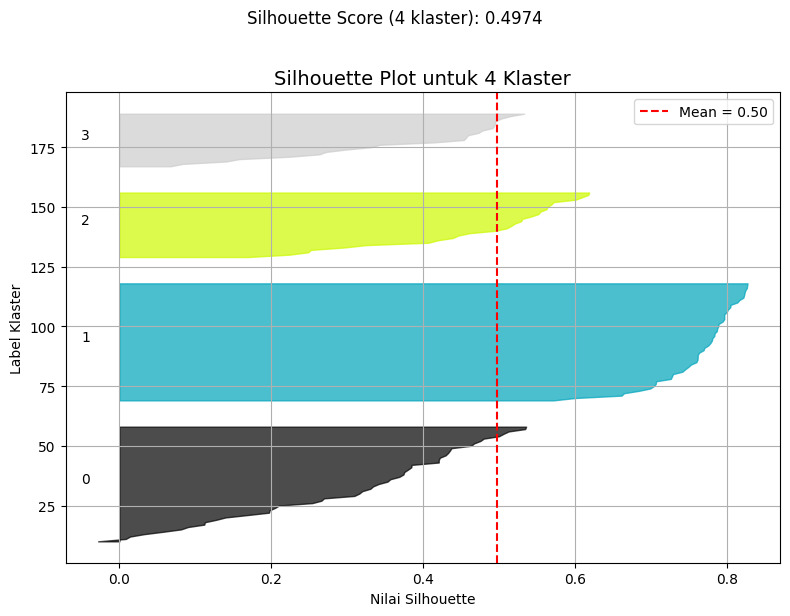

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data numerik
val_X = df[['petal length', 'petal width', 'sepal length', 'sepal width']].values

# KMeans untuk 4 klaster
k_means_C4 = KMeans(n_clusters=4, random_state=42)
labelC4 = k_means_C4.fit_predict(val_X)
silhouetteC4 = silhouette_score(val_X, labelC4)

# Cetak score
print(f"Silhouette Score (4 klaster): {silhouetteC4:.6f}")

# Hitung silhouette per sampel
sample_silhouette_values = silhouette_samples(val_X, labelC4)

# Plot silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
n_clusters = 4
colors = cm.nipy_spectral(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labelC4 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = colors[i]
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Garis rata-rata silhouette
plt.axvline(x=silhouetteC4, color="red", linestyle="--", label=f"Mean = {silhouetteC4:.2f}")

# Tambahkan teks skor di atas plot
plt.title("Silhouette Plot untuk 4 Klaster", fontsize=14)
plt.suptitle(f"Silhouette Score (4 klaster): {silhouetteC4:.4f}", fontsize=12, y=1.02)

plt.xlabel("Nilai Silhouette")
plt.ylabel("Label Klaster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluasi K-means dengan Metode Elbow

setelah kita melakukan klastering dengan 2,3,4 klaster lalu  mengevaluasi dengan Inersia sebagaimana perlu mengevaluasi kembali nilai inersianya dengan **metode elbow** untuk mencari klaster yang paling optimal

### 📘 **Penjelasan tentang Metode Elbow dalam K-Means Clustering**

**Metode Elbow** adalah teknik grafis yang digunakan untuk menentukan **jumlah klaster optimal** dalam algoritma **K-Means Clustering**.

---

### 🧠 **Inti dari Metode Elbow:**

Tujuannya adalah mencari nilai **$k$** (jumlah klaster) terbaik, di mana **penambahan klaster tidak memberikan penurunan signifikan terhadap *inertia*** (jumlah kuadrat jarak titik ke centroid).


### 📉 **Langkah-langkah Metode Elbow:**

1. Jalankan K-Means untuk beberapa nilai $k$ (misal dari 1 sampai 10).
2. Catat nilai **inertia** untuk tiap $k$.
3. Buat grafik:

   * Sumbu X = jumlah klaster $k$
   * Sumbu Y = nilai inertia
4. Cari titik "tekukan" (elbow) di grafik.

   * **Elbow point** adalah nilai $k$ di mana penurunan inertia mulai melambat tajam.
   * Di titik ini, penambahan klaster sudah tidak terlalu meningkatkan kualitas klastering.



### ✅ **Kesimpulan:**

Metode Elbow membantu menghindari **overfitting** (terlalu banyak klaster) dan **underfitting** (terlalu sedikit klaster), dengan memilih jumlah klaster yang **efisien dan optimal** secara visual berdasarkan kurva inertia.


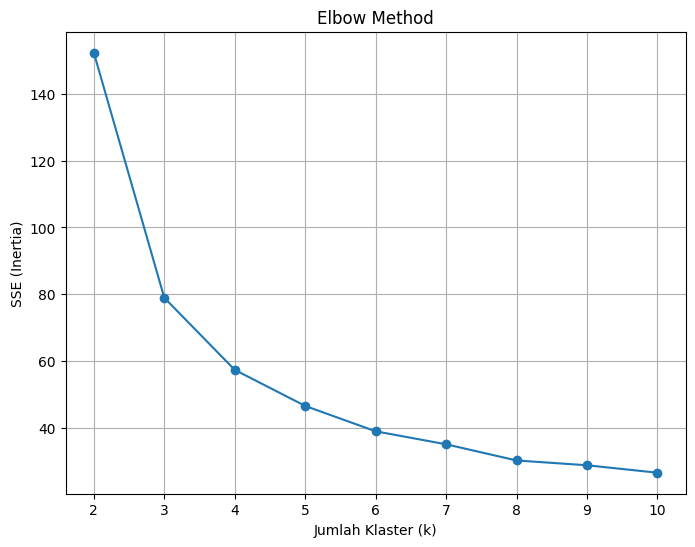

Inertia untuk k=2: 152.368706
Inertia untuk k=3: 78.945066
Inertia untuk k=4: 57.345409
Inertia untuk k=5: 46.535582
Inertia untuk k=6: 38.930963
Inertia untuk k=7: 35.042760
Inertia untuk k=8: 30.198417
Inertia untuk k=9: 28.756456
Inertia untuk k=10: 26.523455


In [107]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
val_X = df[['petal length', 'petal width', 'sepal length', 'sepal width']].values

# Siapkan list untuk menyimpan SSE (Inertia) untuk setiap k
sse = []

# Uji untuk k = 2 hingga 10
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5, max_iter=400, tol=0.0001, algorithm='lloyd')
    kmeans.fit(val_X)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)

# Tampilkan plot
plt.show()

# Print inertia terbaik untuk setiap k
for k, inertia in zip(K_range, sse):
    print(f"Inertia untuk k={k}: {inertia:.6f}")


 k    Inertia  Silhouette Score    Keterangan
 2 152.368706          0.680814              
 3  78.945066          0.550964 ⇐ Elbow Point
 4  57.440280          0.497412              


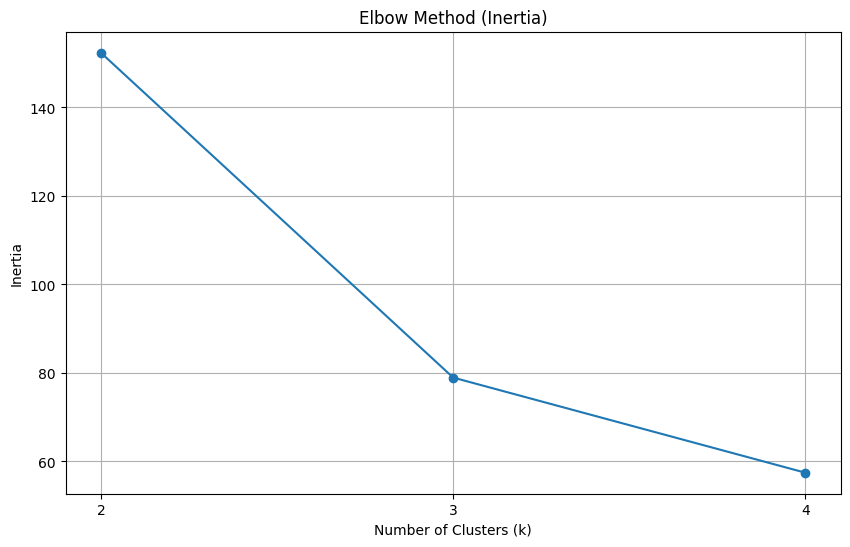

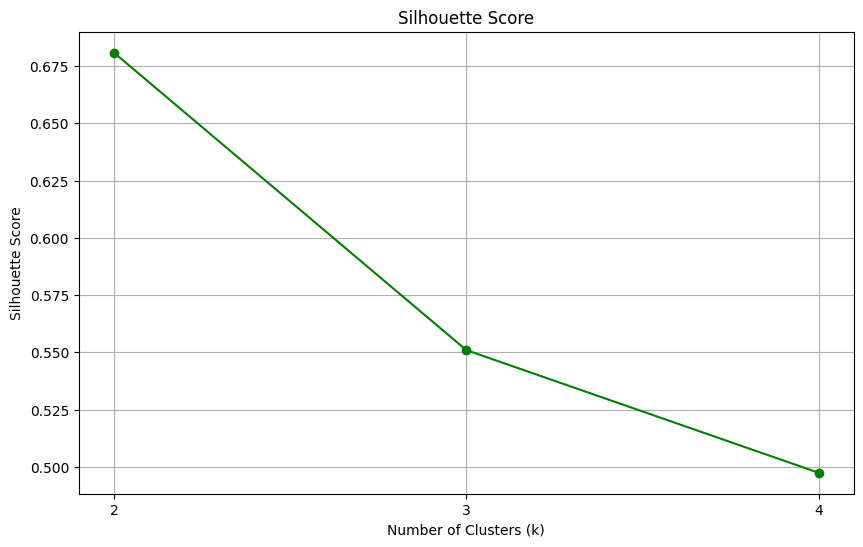

In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
val_X = df[['petal length', 'petal width', 'sepal length', 'sepal width']].values

# Definisikan nilai k yang diuji
k_values = [2, 3, 4]
sse = []  # Untuk menyimpan inertia
silhouette_scores = []  # Untuk menyimpan silhouette score

# Hitung inertia dan silhouette score untuk setiap k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(val_X)
    labels = kmeans.labels_
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(val_X, labels))

# Buat DataFrame untuk hasil
result_df = pd.DataFrame({
    'k': k_values,
    'Inertia': sse,
    'Silhouette Score': silhouette_scores
})

# Hitung penurunan SSE (Delta SSE)
result_df['Delta SSE'] = result_df['Inertia'].shift(1) - result_df['Inertia']
result_df['Keterangan'] = ''

# Tentukan elbow point berdasarkan penurunan SSE terbesar
delta_2_to_3 = result_df.loc[1, 'Delta SSE']
delta_3_to_4 = result_df.loc[2, 'Delta SSE']

if delta_2_to_3 > delta_3_to_4:
    result_df.at[1, 'Keterangan'] = '⇐ Elbow Point'  # K=3 adalah elbow point
else:
    result_df.at[2, 'Keterangan'] = '⇐ Elbow Point'  # K=4 adalah elbow point

# Tampilkan tabel hasil
print(result_df[['k', 'Inertia', 'Silhouette Score', 'Keterangan']].to_string(index=False))

# Visualisasi Elbow Method (Inertia)
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### ✅ **Kesimpulan dari Hasil Evaluasi K-Means Clustering**

Berdasarkan hasil evaluasi untuk jumlah klaster $k = 2, 3, 4$ dengan menggunakan **inertia** dan **silhouette score**, diperoleh:

| k | Inertia    | Silhouette Score | Keterangan    |
| - | ---------- | ---------------- | ------------- |
| 2 | 152.368706 | 0.680814         |               |
| 3 | 78.945066  | 0.550964         | ⇐ Elbow Point |
| 4 | 57.440280  | 0.497412         |               |

#### 💡 Kesimpulan:

* **Inertia** mengalami penurunan signifikan dari $k = 2$ ke $k = 3$, namun penurunannya melambat dari $k = 3$ ke $k = 4$.
* **Silhouette Score** terbaik terjadi pada $k = 2$, menunjukkan klaster yang paling terpisah dan kompak.
* Namun, berdasarkan **metode elbow**, nilai $k = 3$ ditandai sebagai titik optimal (Elbow Point), karena setelah itu penurunan inertia tidak signifikan.

🧾 **Maka, jumlah klaster yang paling seimbang antara kompaknya klaster dan efisiensi jumlah klaster adalah $\mathbf{k = 3}$.**
